<a href="https://colab.research.google.com/github/DevTulioDantas/resolucao_case_e-commerceDNC/blob/main/RID211339_Desafio05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sidetable
!pip install ydata-profiling
!pip install pydantic-settings

from pydantic_settings import BaseSettings

from ydata_profiling import ProfileReport

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import sidetable

import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

from IPython.core.display import HTML
from ipywidgets import interact, widgets
from sklearn.compose import ColumnTransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8a6930b73506764289738723722ec8c5d7be0fbdc86c28977b6a68971b194c64
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112803 entries, 0 to 112802
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    112803 non-null  object 
 1   StockCode    112803 non-null  object 
 2   Description  112478 non-null  object 
 3   Quantity     112803 non-null  int64  
 4   InvoiceDate  112803 non-null  object 
 5   UnitPrice    112803 non-null  float64
 6   CustomerID   74868 non-null   float64
 7   Country      112802 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.9+ MB


In [65]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,112803.000000,112803.000000,74868.000000
mean,8.864090,5.259118,15335.481995
std,317.034745,113.928561,1757.406625
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13875.000000
50%,3.000000,2.460000,15304.000000
75%,8.000000,4.250000,16951.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Verificando nulos

df.missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df.missing.style.format('{:.2%}', subset='missing_pct')

<ipython-input-7-345bdee1cce0>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.missing = (


,missing_count,missing_pct
CustomerID,37935,33.63%
Description,325,0.29%
Country,1,0.00%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%


In [ ]:

(df.isna().sum() / df.shape[0]).to_frame('missing_pct')

,missing_pct
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002881
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.336294
Country,0.000009


In [ ]:
#removendo nulos

df_whitout_na = df.dropna(subset=['CustomerID'])


In [ ]:
#verificando linhas duplicadas

df_whitout_na.duplicated(keep=False).sum()

1928

In [ ]:
#identificando quantos duplicados tem para cada linha


(
  df_whitout_na
  .groupby(df.columns.tolist(),dropna=False)
  .size()
  .to_frame('n_duplicated')
  .query('n_duplicated>1')
  .sort_values('n_duplicated',ascending=False)
)

n_duplicated
InvoiceNo StockCode Description                       Quantity InvoiceDate      UnitPrice CustomerID Country                     
540524    21756     BATH BUILDING BLOCK WORD           1       1/9/2011 12:53   5.95      16735.0    United Kingdom             6
541266    21754     HOME BUILDING BLOCK WORD           1       1/16/2011 16:25  5.95      15673.0    United Kingdom             6
          21755     LOVE BUILDING BLOCK WORD           1       1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD           1       12/12/2010 14:27 5.95      15044.0    United Kingdom             6
538517    22749     FELTCRAFT PRINCESS CHARLOTTE DOLL  1       12/12/2010 16:05 3.75      17618.0    United Kingdom             5
...                                                                                                                           ...
538374    22383     LUNCH BAG SUKI  DESIGN             2       12/12/2010 11:17 1.65      14159.0    United Kingdom             2
538379    22916     HERB MARKER THYME                  1       12/12/2010 11:26 0.65      17126.0    United Kingdom             2
          22917     HERB MARKER ROSEMARY               1       12/12/2010 11:26 0.65      17126.0    United Kingdom             2
          22918     HERB MARKER PARSLEY                1       12/12/2010 11:26 0.65      17126.0    United Kingdom             2
C543837   22423     REGENCY CAKESTAND 3 TIER          -2       2/14/2011 10:56  12.75     14431.0    United Kingdom             2

[924 rows x 1 columns]

In [ ]:
#removendo duplicados

df_whitout_na = df_whitout_na.drop_duplicates()

df_whitout_na

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
112798,545901,22311,OFFICE MUG WARMER BLACK+SILVER,1,3/7/2011 17:52,2.95,15834.0,United Kingdom
112799,545901,22314,OFFICE MUG WARMER CHOC+BLUE,1,3/7/2011 17:52,2.95,15834.0,United Kingdom
112800,545901,22312,OFFICE MUG WARMER POLKADOT,2,3/7/2011 17:52,2.95,15834.0,United Kingdom
112801,545901,M,Manual,2,3/7/2011 17:52,1.25,15834.0,United Kingdom


<Axes: >

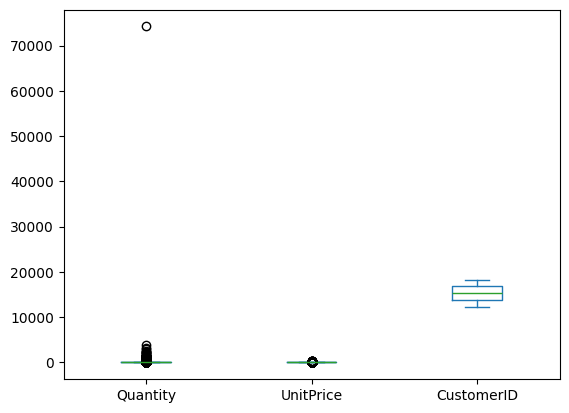

In [ ]:
#tratando outliers

df_whitout_na.plot.box()

In [ ]:
df_whitout_na['Quantity'] = pd.to_numeric(df_whitout_na['Quantity'], errors='coerce')

In [ ]:
#identifcando quantidades negativas

df_whitout_na[df_whitout_na['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [66]:
#identificando preço nulo ou negativo
df_whitout_na[df_whitout_na['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom


In [67]:
#removendo dados com a quantidade negativa

df_whitout_na = df_whitout_na[df_whitout_na["Quantity"] > 0]
f_whitout_na = df_whitout_na[df_whitout_na["UnitPrice"] > 0]
df_whitout_na

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
112798,545901,22311,OFFICE MUG WARMER BLACK+SILVER,1,3/7/2011 17:52,2.95,15834.0,United Kingdom
112799,545901,22314,OFFICE MUG WARMER CHOC+BLUE,1,3/7/2011 17:52,2.95,15834.0,United Kingdom
112800,545901,22312,OFFICE MUG WARMER POLKADOT,2,3/7/2011 17:52,2.95,15834.0,United Kingdom
112801,545901,M,Manual,2,3/7/2011 17:52,1.25,15834.0,United Kingdom


In [68]:
df_whitout_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71906 entries, 0 to 112802
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    71906 non-null  object 
 1   StockCode    71906 non-null  object 
 2   Description  71906 non-null  object 
 3   Quantity     71906 non-null  int64  
 4   InvoiceDate  71906 non-null  object 
 5   UnitPrice    71906 non-null  float64
 6   CustomerID   71906 non-null  float64
 7   Country      71905 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.0+ MB


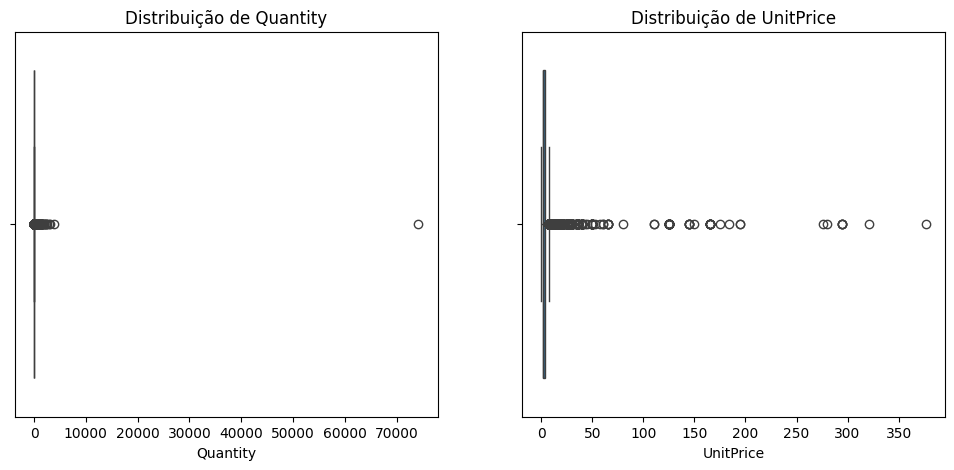

In [83]:
#tratando outliers
plt.figure(figsize=(12, 5))

# Boxplot para Quantity
plt.subplot(1, 2, 1)
sns.boxplot(x=df_whitout_na['Quantity'])
plt.title("Distribuição de Quantity")

# Boxplot para UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(x=df_whitout_na['UnitPrice'])
plt.title("Distribuição de UnitPrice")

plt.show()

In [84]:
# filtrar os dados removendo os outliers extremos
df_clean = df_whitout_na[(df_whitout_na['Quantity'] <= 10000) & (df_whitout_na['UnitPrice'] <= 5000)]

In [92]:
#quantidade de outliers na coluna Quantity

is_outlier(df_whitout_na.Quantity).sum()

4708

In [90]:
#quantidade de outliers na coluna Quantity

is_outlier(df_whitout_na.UnitPrice).sum()

7086

In [93]:
# Remover outliers do DataFrame
df_clean = df_whitout_na[(df_whitout_na['Quantity'] <= 10000) & (df_whitout_na['UnitPrice'] <= 5000)]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71905 entries, 0 to 112802
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    71905 non-null  object 
 1   StockCode    71905 non-null  object 
 2   Description  71905 non-null  object 
 3   Quantity     71905 non-null  int64  
 4   InvoiceDate  71905 non-null  object 
 5   UnitPrice    71905 non-null  float64
 6   CustomerID   71905 non-null  float64
 7   Country      71904 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.9+ MB


In [94]:
# correção  o tipo de dado do CustomerID
# correção o tipo de dado da InvoiceDate

df_clean['CustomerID'] = df_whitout_na['CustomerID'].astype(int)
df_clean['InvoiceDate'] = pd.to_datetime(df_whitout_na['InvoiceDate'])

<ipython-input-94-6d7c2e2276d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CustomerID'] = df_whitout_na['CustomerID'].astype(int)
<ipython-input-94-6d7c2e2276d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_whitout_na['InvoiceDate'])


In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71905 entries, 0 to 112802
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    71905 non-null  object        
 1   StockCode    71905 non-null  object        
 2   Description  71905 non-null  object        
 3   Quantity     71905 non-null  int64         
 4   InvoiceDate  71905 non-null  datetime64[ns]
 5   UnitPrice    71905 non-null  float64       
 6   CustomerID   71905 non-null  int64         
 7   Country      71904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.9+ MB


In [96]:
#coluna total

df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

<ipython-input-96-478d6b41c263>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']


In [101]:
#selecionando a ultima data

last_date = df_clean['InvoiceDate'].max()
print(last_date)

2011-03-07 17:52:00


<ipython-input-102-75fd3660a099>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


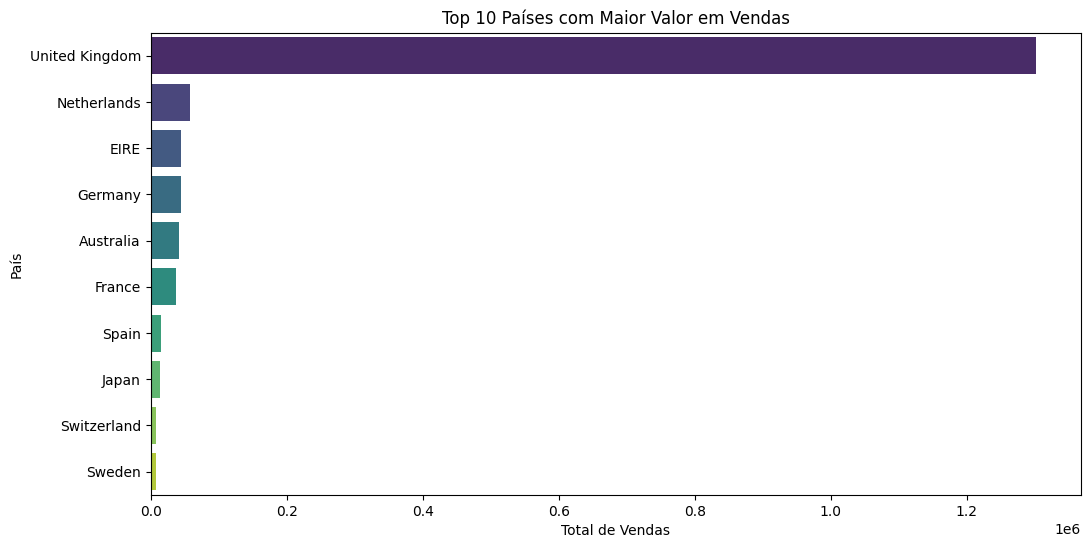

In [102]:
# Agrupar por país e somar o total das vendas
top_countries = df_clean.groupby('Country')['TotalPrice'].sum().nlargest(10)

# Plotar
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel("Total de Vendas")
plt.ylabel("País")
plt.title("Top 10 Países com Maior Valor em Vendas")
plt.show()

<ipython-input-103-e6f88956b93f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')


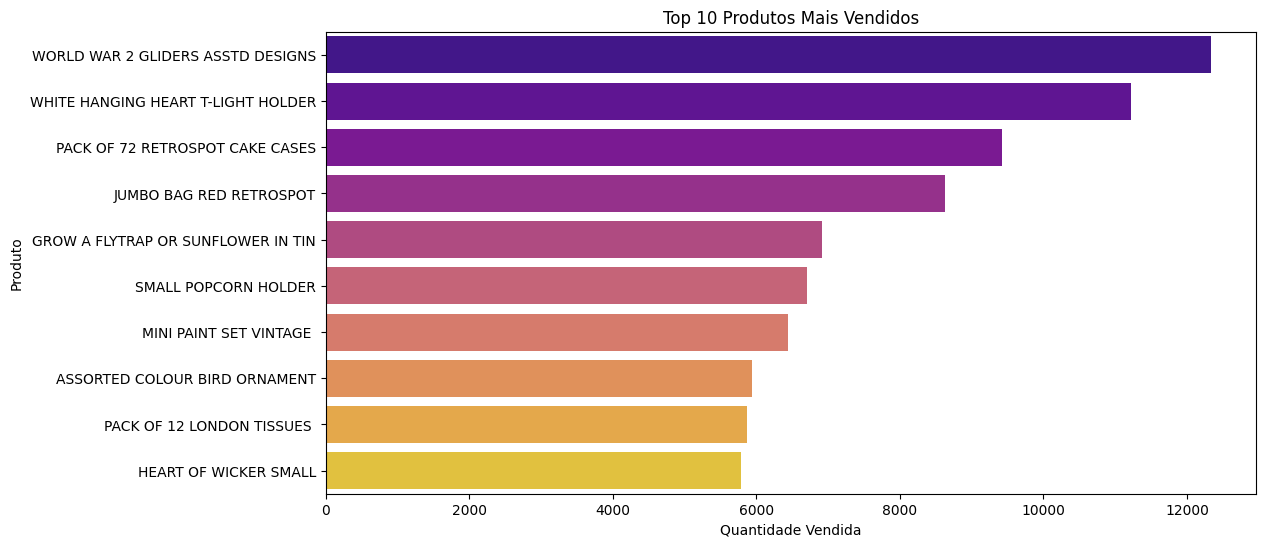

In [103]:
# Agrupar por produto e somar a quantidade
top_products = df_clean.groupby('Description')['Quantity'].sum().nlargest(10)

# Plotar
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.title("Top 10 Produtos Mais Vendidos")
plt.show()

<ipython-input-105-8641e671171d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')


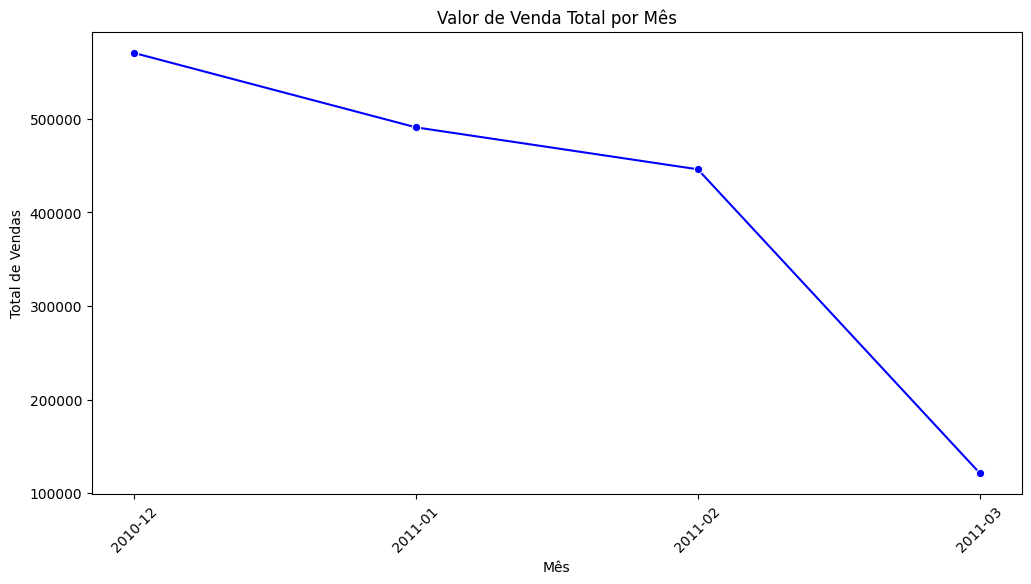

In [105]:
# Criar a coluna de mês
df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')

# Agrupar por mês e somar as vendas
sales_per_month = df_clean.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_per_month.index.astype(str), y=sales_per_month.values, marker='o', color='b')
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)
plt.title("Valor de Venda Total por Mês")
plt.show()

<ipython-input-107-2b2f8016568e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_countries['Month'] = df_top_countries['InvoiceDate'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

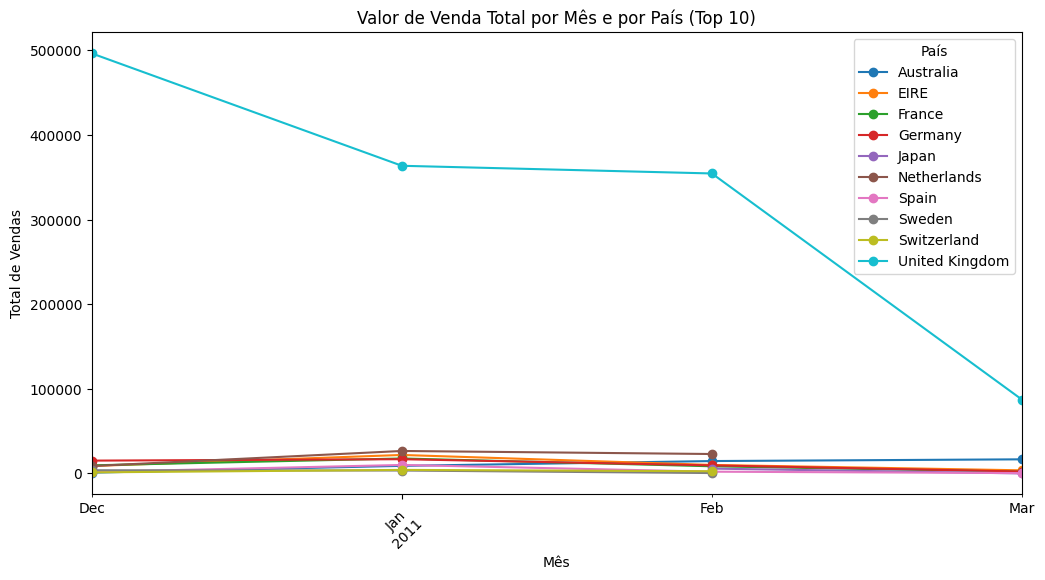

In [107]:
# Selecionar os top 10 países
top_10_countries = df_clean.groupby('Country')['TotalPrice'].sum().nlargest(10).index

# Filtrar apenas os top 10 países
df_top_countries = df_clean[df_clean['Country'].isin(top_10_countries)]

# Criar a coluna de mês
df_top_countries['Month'] = df_top_countries['InvoiceDate'].dt.to_period('M')

# Agrupar por mês e país
sales_per_month_country = df_top_countries.groupby(['Month', 'Country'])['TotalPrice'].sum().unstack()

# Plotar
plt.figure(figsize=(12, 6))
sales_per_month_country.plot(kind='line', marker='o', figsize=(12, 6), colormap='tab10')
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.title("Valor de Venda Total por Mês e por País (Top 10)")
plt.legend(title="País")
plt.xticks(rotation=45)
plt.show();

In [109]:
#calculo de rfm

#agrupar por Cliente e Pedido (InvoiceNo) e calcular a data e total do pedido

rfm = df_clean.groupby(['CustomerID', 'InvoiceNo']).agg(
    InvoiceDate=('InvoiceDate', 'max'),
    TotalOrderPrice=('TotalPrice', 'sum')
).reset_index()

In [110]:
#ultima data de compra no dataset
last_date = df_clean['InvoiceDate'].max()

#agrupar por cliente e calcular RFM
rfm = rfm_data.groupby('CustomerID').agg(
    R=('InvoiceDate', lambda x: (last_date - x.max()).days),  # Recência
    F=('InvoiceNo', 'count'),  # Frequência
    M=('TotalOrderPrice', 'mean')  # Ticket médio
).reset_index()

In [112]:
#ver as primeiras linhas
print(rfm.head())

#salvar o output em CSV
rfm.to_csv('rfm_output.csv', index=False)

   CustomerID   R  F        M
0       12347  40  2   593.59
1       12348  41  2   560.12
2       12350  33  1   334.40
3       12352   6  3   427.05
4       12356  48  1  2271.62
